## Mean / Median imputation

[Feature Engineering for Machine Learning Course](https://www.trainindata.com/p/feature-engineering-for-machine-learning)

Imputation is the act of replacing missing data with statistical estimates of the missing values. The goal of any imputation technique is to produce a **complete dataset** that can be used to train machine learning models.

Mean/median imputation consists of replacing all occurrences of missing values (NA) within a variable by the mean (if the variable has a Gaussian distribution) or median (if the variable has a skewed distribution).

**Note**:

If a variable is normally distributed, the mean, median, and mode are approximately the same. Therefore, replacing missing values by the mean and the median are equivalent.

If the variable is skewed, the mean is biased towards values at the end of the distribution. As a result, the median represents the majority of the values in the variable better.

Replacing missing data by the mode is not common practice for numerical variables.

### Which variables can I impute with mean or median imputation?

The mean and median can only be calculated on numerical variables. Therefore, these methods are suitable for continuous and discrete numerical variables only.

### Assumptions

- Data is missing completely at random.

If data is missing at random, it's safe to assume that the missing values are extremely close to the mean or median of the distribution, which is the value of the majority of the observations.

### Advantages

- Fast way of obtaining complete datasets

### Limitations

- Distortion of the original variable distribution (if the fraction of NA is large):

- Distortion of the variance

- Distortion of the covariance with other variables of the dataset

If the proportion of NA is large, the variance of the variable will be distorted when it is replaced with the mean or median, resulting in an underestimating of the variance.

Estimates of covariance and correlations with other variables may also be affected. Because the mean or median value that now substitutes the missing data does not always retain the relation with the remaining variables, mean or median imputation may change intrinsic correlations.

Finally, "concentrating" missing values at the mean or median value may lead to observations that are common occurrences in the distribution being picked up as outliers.

### When should mean or median imputation be used?

- Data is missing completely at random

- No more than 5% of the variable contains missing data

Although in theory, the above conditions should be met to minimise the impact of this imputation technique, in practice, mean / median imputation is very commonly used, even when data is not MCAR and the fraction of missing values is large. The reason behind this, is the simplicity of the technique.

### Final note

Replacement of NA with mean or median is widely used in the data science community and in data science competitions. See, for example, the winning solution of the KDD 2009 cup: ["Winning the KDD Cup Orange Challenge with Ensemble Selection"](http://www.mtome.com/Publications/CiML/CiML-v3-book.pdf).

Typically, mean and median imputation is done together with adding a "missing indicator" variable to mark observations where the data was missing (see lecture "Missing Indicator"), thus covering 2 angles: if the data was missing completely at random, this would be captured by the mean and median imputation, and if it wasn't, this would be captured by the additional "missing indicator" variable. Both methods are extremely straightforward to implement and therefore are a top choice for imputation.

## Datasets:

- Ames House Price
- Titanic

To download the datasets, please refer to the lecture **Datasets** in **Section 2** of this course.


In [10]:
%load_ext jupyter_black

In [11]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

# to split the datasets
from sklearn.model_selection import train_test_split

## Titanic


In [12]:
# Load the Titanic dataset with a few variables for demonstration.

data = pd.read_csv(
    "../../Datasets/titanic.csv", usecols=["age", "fare", "survived"]
)
data.head()

,survived,age,fare
0,1,29.0000,211.3375
1,1,0.9167,151.5500
2,0,2.0000,151.5500
3,0,30.0000,151.5500
4,0,25.0000,151.5500


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1309 entries, 0 to 1308
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   survived  1309 non-null   int64  
 1   age       1046 non-null   float64
 2   fare      1308 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 30.8 KB


In [14]:
# Let's look at the fraction of NA.

pd.DataFrame(
    {
        "null_count": data.isnull().sum(),
        "null_percentage": data.isnull().mean() * 100,
    }
)

,null_count,null_percentage
survived,0,0.000000
age,263,20.091673
fare,1,0.076394


Age and fare show missing data. If instead of `mean()`, we use `sum()`, we will see that fare only has 1 missing value.

### Imputation important

The imputation values (that is the mean/median) should be calculated using the training set, and the same value should be used to impute the test set. This is to avoid overfitting.


In [15]:
# Let's separate into training and testing set.

X_train, X_test, y_train, y_test = train_test_split(
    data[["age", "fare"]],  # predictors
    data["survived"],  # target
    test_size=0.5,  # percentage of obs in test set
    random_state=0,
)  # seed to ensure reproducibility

X_train.shape, X_test.shape

((654, 2), (655, 2))

In [16]:
# Let's explore the missing data in the train set.
# The percentage of NA should be fairly similar to those
# observed in the whole dataset.

X_train.isnull().mean()

age     0.191131
fare    0.000000
dtype: float64

In [17]:
# Calculate the median Age.

median = X_train.age.median()
median

28.0

In [18]:
# Calculate the mean Age

mean = X_train.age.mean()

# The mean contains many decimals, so I round to 1
# using the round function from numpy.
mean = np.round(mean, 1)

mean

30.0

In [19]:
# Create a new variable with the missing values replaced
# using the function we created above.

# First, replace with the median.
X_train["Age_median"] = X_train["age"].fillna(median)

# Now replace with the mean.
X_train["Age_mean"] = X_train["age"].fillna(mean)

X_train.head(15)

,age,fare,Age_median,Age_mean
293,NaN,52.0000,28.0,30.0
76,39.0,83.1583,39.0,39.0
48,53.0,27.4458,53.0,53.0
689,22.0,7.2500,22.0,22.0
1195,NaN,7.7500,28.0,30.0
1182,21.0,7.6500,21.0,21.0
332,23.0,10.5000,23.0,23.0
576,40.0,13.0000,40.0,40.0
622,4.0,31.2750,4.0,4.0
564,40.0,13.0000,40.0,40.0


Look at the rows with missing data (NaN) in Age, and see how in the new variables those were replaced by either 28 (median) or 30 (mean).


In [20]:
# We can see a change in the variance after mean / median imputation.
# This is expected, because the percentage of missing data is quite
# high in Age, ~20%.

print("Original variable variance: ", X_train["age"].var())
print("Variance after median imputation: ", X_train["Age_median"].var())
print("Variance after mean imputation: ", X_train["Age_mean"].var())

Original variable variance:  194.29926044010145
Variance after median imputation:  157.7015471214206
Variance after mean imputation:  157.10590761240317


As expected, the variance is underestimated because many values are now the same (i.e., the mean or the median value).


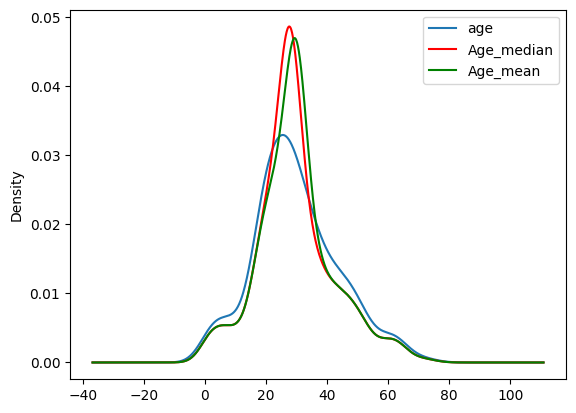

In [21]:
# We can see that the distribution has changed:
# there are now more values towards the median
# or median.

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train["age"].plot(kind="kde", ax=ax)

# variable imputed with the median
X_train["Age_median"].plot(kind="kde", ax=ax, color="red")

# variable imputed with the mean
X_train["Age_mean"].plot(kind="kde", ax=ax, color="green")

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")

As mentioned previously, the mean / median imputation distorted the original distribution of the variable Age. The transformed variable shows more values around the mean / median values.

**Is this important?**

It depends on the machine learning model you want to build. Distorting the variable distribution may affect its relationship with the target, which might be important for linear models. Therefore, the final imputed variable might negatively affect the linear model's performance.


In [22]:
# We also said that mean / median imputation may affect the relationship
# with the other variables in the dataset.

# Let's have a look.

X_train[["fare", "age", "Age_median", "Age_mean"]].cov()

,fare,age,Age_median,Age_mean
fare,2199.947144,111.318279,93.569378,89.939797
age,111.318279,194.299260,194.299260,194.299260
Age_median,93.569378,194.299260,157.701547,157.094053
Age_mean,89.939797,194.299260,157.094053,157.105908


The covariance between Age and Fare changed with the mean / median imputation.


<Axes: >

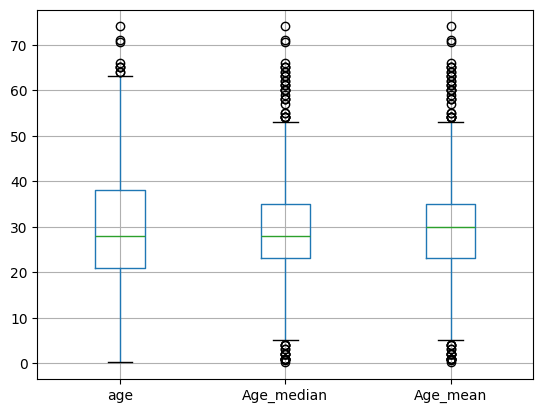

In [23]:
# Finally, I mentioned that mean / median imputation may lead
# inliers to look like outliers.

# In other words, mean / median imputation may lead to an increase
# in the number of detected outliers.

# Let's find out using a boxplot.
X_train[["age", "Age_median", "Age_mean"]].boxplot()

From the boxplot, we can see that after the imputation, we not only have more outliers at the higher age values, but we now have outliers as well at the lower age values.

**Is this important?**

If we are after true outliers, we need to keep this behavior in mind to make sure that we are neither masking nor creating artificial outliers with our imputation technique. In practice, we normally don't check for this behaviour at all. But I think it is important to know that it is happening.

## House Prices Dataset

In this dataset, there are variables with a lot or with a few missing data points. Therefore, we can compare the effects of mean and median imputation in both cases.


In [24]:
# We'll use the following variables,
# 3 of which contain NA.

cols_to_use = [
    "OverallQual",
    "TotalBsmtSF",
    "1stFlrSF",
    "GrLivArea",
    "WoodDeckSF",
    "BsmtUnfSF",
    "LotFrontage",
    "MasVnrArea",
    "GarageYrBlt",
    "SalePrice",
]

In [26]:
# Let's load the House Prices dataset.

data = pd.read_csv("../../Datasets/houseprice.csv", usecols=cols_to_use)
print(data.shape)
data.head()

(1460, 10)


,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,SalePrice
0,65.0,7,196.0,150,856,856,1710,2003.0,0,208500
1,80.0,6,0.0,284,1262,1262,1262,1976.0,298,181500
2,68.0,7,162.0,434,920,920,1786,2001.0,0,223500
3,60.0,7,0.0,540,756,961,1717,1998.0,0,140000
4,84.0,8,350.0,490,1145,1145,2198,2000.0,192,250000


In [50]:
pd.DataFrame(
    {
        "nunique": data.nunique(),
        "dtype": data.dtypes,
        "null_count": data.isnull().sum(),
        "null_percentage": 100 * data.isnull().mean(),
    }
).sort_values(by="null_percentage", ascending=False)

,nunique,dtype,null_count,null_percentage
LotFrontage,110,float64,259,17.739726
GarageYrBlt,97,float64,81,5.547945
MasVnrArea,327,float64,8,0.547945
OverallQual,10,int64,0,0.000000
BsmtUnfSF,780,int64,0,0.000000
TotalBsmtSF,721,int64,0,0.000000
1stFlrSF,753,int64,0,0.000000
GrLivArea,861,int64,0,0.000000
WoodDeckSF,274,int64,0,0.000000
SalePrice,663,int64,0,0.000000


In [27]:
# print the variables with missing data.

# In the next list comprehension, I loop over all the columns
# of the dataset and select those with missing data.

[var for var in data.columns if data[var].isnull().sum() > 0]

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [28]:
# Find the percentage of missing data in those variables
# (same code used in section 3).

data[["LotFrontage", "MasVnrArea", "GarageYrBlt"]].isnull().mean()

LotFrontage    0.177397
MasVnrArea     0.005479
GarageYrBlt    0.055479
dtype: float64

**Remember that the mean and the median that we will use to replace the NA are calculated using the train set.**


In [29]:
# Let's separate into training and testing sets.

X_train, X_test, y_train, y_test = train_test_split(
    data.drop("SalePrice", axis=1),
    data["SalePrice"],
    test_size=0.3,
    random_state=0,
)

X_train.shape, X_test.shape

((1022, 9), (438, 9))

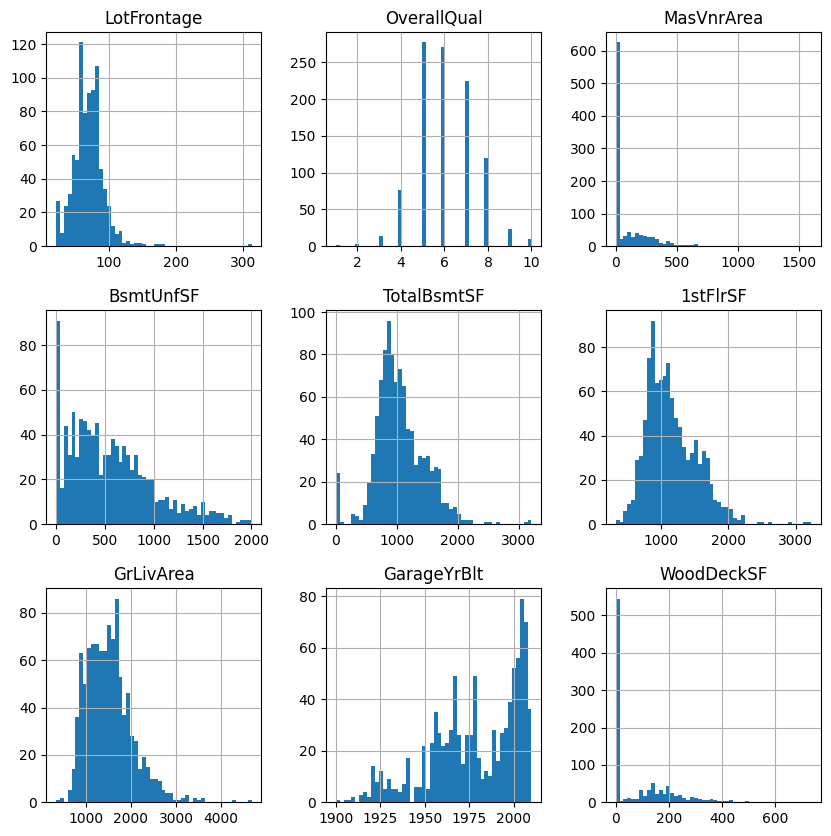

In [30]:
# Let's plot the distributions of the variables.
# We learned this code in section 3.

X_train.hist(bins=50, figsize=(10, 10))
plt.show()

In [31]:
# Create a new variable with missing values replaced
# by the median using the function we created previously.

# I repeat the following lines for each of the variables with NA
# over the next cells.

median = X_train["LotFrontage"].median()

X_train["LotFrontage_median"] = X_train["LotFrontage"].fillna(median)
X_test["LotFrontage_median"] = X_test["LotFrontage"].fillna(median)

In [32]:
median = X_train["MasVnrArea"].median()

X_train["MasVnrArea_median"] = X_train["MasVnrArea"].fillna(median)
X_test["MasVnrArea_median"] = X_test["MasVnrArea"].fillna(median)

In [33]:
median = X_train["GarageYrBlt"].median()

X_train["GarageYrBlt_median"] = X_train["GarageYrBlt"].fillna(median)
X_test["GarageYrBlt_median"] = X_test["GarageYrBlt"].fillna(median)

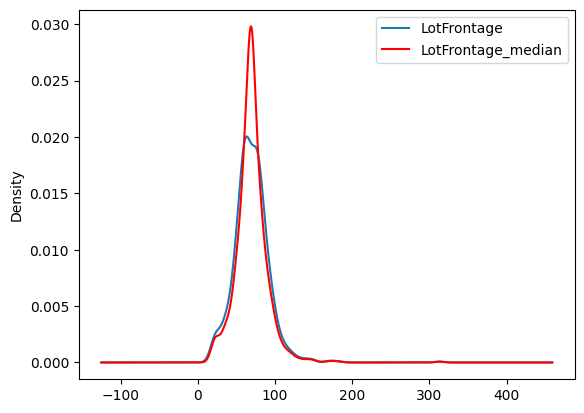

In [34]:
# Let's evaluate the effect of median imputation on the distribution.

# We can see that the distribution has changed for LotFrontAge,
# there are more values towards the median.

fig = plt.figure()
ax = fig.add_subplot(111)

# Original variable distribution.
X_train["LotFrontage"].plot(kind="kde", ax=ax)

# Variable imputed with the median.
X_train["LotFrontage_median"].plot(kind="kde", ax=ax, color="red")

# Add legends.
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")

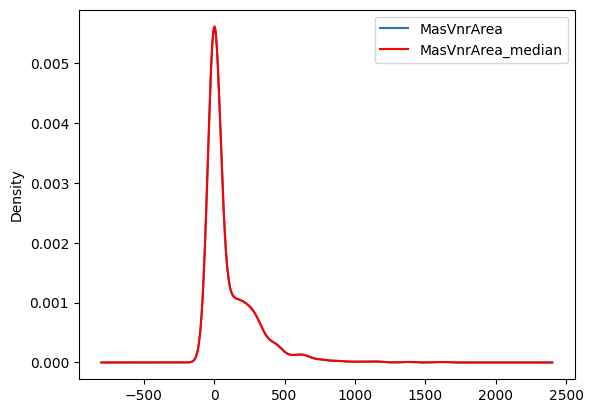

In [35]:
# For MasVnrArea, because the percentage of missing data
# was low, we don't expect and won't see a dramatic change in the
# distribution of the variable.

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train["MasVnrArea"].plot(kind="kde", ax=ax)

# variable imputed with the median
X_train["MasVnrArea_median"].plot(kind="kde", ax=ax, color="red")

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")

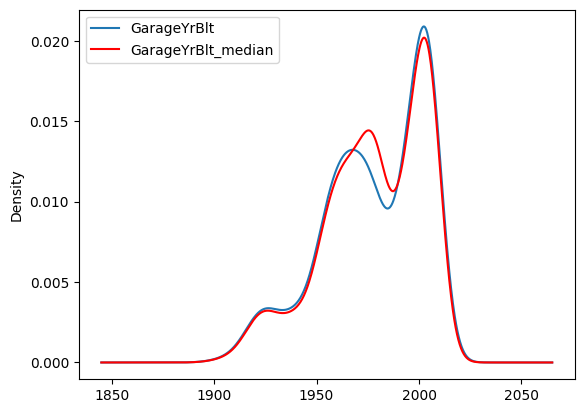

In [36]:
# Similarly, for GarageBlt, because the percentage of missing data
# was low, we don't expect a big change in the
# distribution. However, we see more values
# around the median.

fig = plt.figure()
ax = fig.add_subplot(111)

# original variable distribution
X_train["GarageYrBlt"].plot(kind="kde", ax=ax)

# variable imputed with the median
X_train["GarageYrBlt_median"].plot(kind="kde", ax=ax, color="red")

# add legends
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc="best")

In [37]:
# We can also explore the effect of the imputation technique on
# the variance.

# We can see a change in the variance after imputation of LotFrontAge.
# This is expected, because the percentage of missing data is quite
# high ~20%.

print("Original Variance: ", X_train["LotFrontage"].var())
print(
    "Variance after median imputation: ", X_train["LotFrontage_median"].var()
)

Original Variance:  532.5872021885677
Variance after median imputation:  434.0660426541647


In [38]:
# This is not the case for MasnVnrArea,
# because the % of missing data was small.

print("Original Variance: ", X_train["MasVnrArea"].var())
print("Variance after median imputation: ", X_train["MasVnrArea_median"].var())

Original Variance:  32983.53871003956
Variance after median imputation:  32874.27007404199


In [39]:
# For GarageBlt, the % of missing data was small, so the effect
# on the variance will also be small.

print("Original Variance: ", X_train["GarageYrBlt"].var())
print(
    "Variance after median imputation: ", X_train["GarageYrBlt_median"].var()
)

Original Variance:  624.3059475074142
Variance after median imputation:  591.3356883144761


In [40]:
# Finally, let's explore the covariance:
# Take your time to compare the values in the table below.
# See how the covariance is affected for LotFrontAge but not
# so much for the other 2 variables.

X_train.cov()

,LotFrontage,OverallQual,MasVnrArea,BsmtUnfSF,TotalBsmtSF,1stFlrSF,GrLivArea,GarageYrBlt,WoodDeckSF,LotFrontage_median,MasVnrArea_median,GarageYrBlt_median
LotFrontage,532.587202,6.587119,680.560330,949.657293,2908.855504,3379.793504,3919.951834,30.611717,134.741376,532.587202,674.423263,28.095264
OverallQual,6.587119,1.843859,101.496976,174.614725,288.624075,224.297266,409.124216,17.902809,31.685571,5.384774,100.533003,16.875386
MasVnrArea,680.560330,101.496976,32983.538710,7540.788093,24788.765410,20865.952051,35207.851440,1203.583792,3208.924282,553.921303,32983.538710,1134.380889
BsmtUnfSF,949.657293,174.614725,7540.788093,187524.082211,75133.073210,49874.491456,52033.920768,1823.065167,-1833.200962,788.095358,7472.110064,1724.141544
TotalBsmtSF,2908.855504,288.624075,24788.765410,75133.073210,168293.103282,121207.901604,86151.918290,3173.042442,12279.657062,2370.929189,24654.359956,2989.473391
1stFlrSF,3379.793504,224.297266,20865.952051,49874.491456,121207.901604,139865.628874,104440.129463,2009.195552,11094.055866,2750.747094,20801.356845,1890.271636
GrLivArea,3919.951834,409.124216,35207.851440,52033.920768,86151.918290,104440.129463,268127.660673,2738.982988,15583.954782,3189.685753,34967.143367,2576.345636
GarageYrBlt,30.611717,17.902809,1203.583792,1823.065167,3173.042442,2009.195552,2738.982988,624.305948,665.891118,24.755173,1182.673336,624.305948
WoodDeckSF,134.741376,31.685571,3208.924282,-1833.200962,12279.657062,11094.055866,15583.954782,665.891118,16485.820460,106.009105,3212.100972,627.624634
LotFrontage_median,532.587202,5.384774,553.921303,788.095358,2370.929189,2750.747094,3189.685753,24.755173,106.009105,434.066043,548.848031,22.883476


<Axes: >

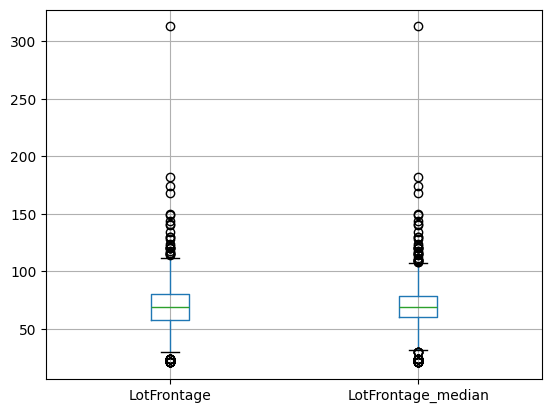

In [41]:
# Finally, let's explore the effect on outliers.

# There is a decrease in the outlier boundaries for LotFrontage
# (look at the height of the top whiskers),
# but there is not a visible effect for the other 2 variables.

X_train[["LotFrontage", "LotFrontage_median"]].boxplot()

<Axes: >

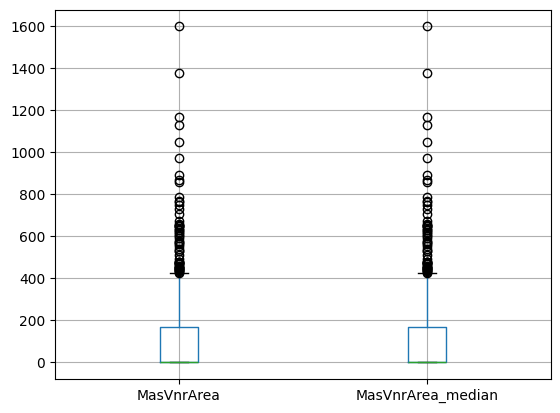

In [42]:
X_train[["MasVnrArea", "MasVnrArea_median"]].boxplot()

<Axes: >

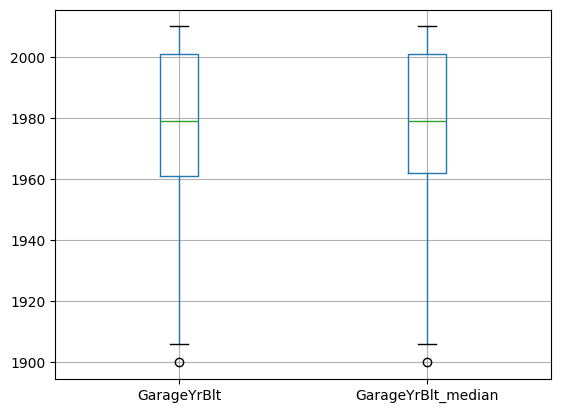

In [43]:
X_train[["GarageYrBlt", "GarageYrBlt_median"]].boxplot()

Later in this section, we will carry out mean / median imputation with open source Python packages.
